<a href="https://colab.research.google.com/github/esdrasantos/statistical-concepts-and-practice/blob/main/cstfm_mod_8_t-z-tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from scipy.stats import t
from scipy.stats import norm

# Teste T, P(T>t), t-stat=1.37 e df(degress of freedom)=29
print(t.sf(1.37,29))

# Teste T, P(T<t), t-stat=-4, df=29
print(1-t.sf(-4,29))

# Teste Z, P(Z>z), z-stat=1.03
print(norm.sf(1.03))

0.09060058219219326
0.0002000319728262534
0.15150500278834367


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import pandas as pd
import os
import re

# Buscando dados de tabelas .csv hospedadas no google drive⚡

In [5]:
dir = '/content/drive/MyDrive/faturas_nu_csv'

arquivos = [arquivo for arquivo in os.listdir(dir)]

padrao = f"_(.*?)-"

arquivosord = sorted(arquivos, key=lambda x: int(re.findall(padrao, x)[0]))
arquivosord = sorted(arquivosord, key=lambda x: int(x.split('-')[1]))
arquivosord

['Nubank_2025-01-11.csv',
 'Nubank_2025-02-11.csv',
 'Nubank_2025-03-11.csv',
 'Nubank_2025-04-11.csv',
 'Nubank_2025-05-11.csv',
 'Nubank_2025-06-11.csv',
 'Nubank_2025-07-11.csv',
 'Nubank_2025-08-11.csv',
 'Nubank_2025-09-11.csv',
 'Nubank_2025-10-11.csv',
 'Nubank_2025-11-11.csv']

In [6]:
dados = pd.DataFrame()

for arquivo in arquivosord:
  tabela = pd.read_csv(f'{dir}/{arquivo}')
  tabela['Arquivo Origem'] = arquivo
  dados = pd.concat([dados,tabela])

dados.reset_index(drop=True,inplace=True)
dados

,Data,Compra,Valor,Categoria,Arquivo Origem
0,01 DEZ,Uber* Trip,"R$ 12,99",Transporte,Nubank_2025-01-11.csv
1,04 DEZ,Amazon Marketplace - Parcela 2/7,"R$ 53,28",Shopping e ecommerce,Nubank_2025-01-11.csv
2,04 DEZ,Saoleopoldomeias - Parcela 2/4,"R$ 75,50",Shopping e ecommerce,Nubank_2025-01-11.csv
3,04 DEZ,Amazon Marketplace - Parcela 7/8,"R$ 53,13",Shopping e ecommerce,Nubank_2025-01-11.csv
4,04 DEZ,Amazon Marketplace - Parcela 3/6,"R$ 55,20",Shopping e ecommerce,Nubank_2025-01-11.csv
...,...,...,...,...,...
1065,01 NOV,•••• 2796 Uber* Trip,"R$ 31,00",Transporte,Nubank_2025-11-11.csv
1066,01 NOV,•••• 4725 Cicclo,"R$ 17,90",Lavanderia,Nubank_2025-11-11.csv
1067,02 NOV,•••• 2796 Uber* Trip,"R$ 5,87",Transporte,Nubank_2025-11-11.csv
1068,02 NOV,•••• 2796 Macromix Fl,"R$ 126,86",Mercados,Nubank_2025-11-11.csv


In [7]:
dados['Fech. Fatura'] = dados['Arquivo Origem']\
.str.rsplit('_', n=1).str[1]\
.str.split('.').str[0]
dados.head()

,Data,Compra,Valor,Categoria,Arquivo Origem,Fech. Fatura
0,01 DEZ,Uber* Trip,"R$ 12,99",Transporte,Nubank_2025-01-11.csv,2025-01-11
1,04 DEZ,Amazon Marketplace - Parcela 2/7,"R$ 53,28",Shopping e ecommerce,Nubank_2025-01-11.csv,2025-01-11
2,04 DEZ,Saoleopoldomeias - Parcela 2/4,"R$ 75,50",Shopping e ecommerce,Nubank_2025-01-11.csv,2025-01-11
3,04 DEZ,Amazon Marketplace - Parcela 7/8,"R$ 53,13",Shopping e ecommerce,Nubank_2025-01-11.csv,2025-01-11
4,04 DEZ,Amazon Marketplace - Parcela 3/6,"R$ 55,20",Shopping e ecommerce,Nubank_2025-01-11.csv,2025-01-11


# Corrigindo as datas das observações ⛴

In [8]:
dia_mes = dados['Data'].str.split(' ')
dados['Dia'] = dia_mes.str[0].str.strip()
dados['Mes'] = dia_mes.str[1].str.strip()
dados['Ano'] = dados['Fech. Fatura'].str\
              .split('-').str[0]\
              .str.strip()
meses = {
    "JAN": 1,
    "FEV": 2,
    "MAR": 3,
    "ABR": 4,
    "MAI": 5,
    "JUN": 6,
    "JUL": 7,
    "AGO": 8,
    "SET": 9,
    "OUT": 10,
    "NOV": 11,
    "DEZ": 12
}

dados['N Mes'] = dados['Mes'].map(meses)

dados['Data_Compra_Aux'] = dados.Ano + "-"\
                           + dados['N Mes'].astype(str) + "-"\
                           + dados.Dia
dados[-5:]  # Retorna os últimos 5 valores

,Data,Compra,Valor,Categoria,Arquivo Origem,Fech. Fatura,Dia,Mes,Ano,N Mes,Data_Compra_Aux
1065,01 NOV,•••• 2796 Uber* Trip,"R$ 31,00",Transporte,Nubank_2025-11-11.csv,2025-11-11,01,NOV,2025,11,2025-11-01
1066,01 NOV,•••• 4725 Cicclo,"R$ 17,90",Lavanderia,Nubank_2025-11-11.csv,2025-11-11,01,NOV,2025,11,2025-11-01
1067,02 NOV,•••• 2796 Uber* Trip,"R$ 5,87",Transporte,Nubank_2025-11-11.csv,2025-11-11,02,NOV,2025,11,2025-11-02
1068,02 NOV,•••• 2796 Macromix Fl,"R$ 126,86",Mercados,Nubank_2025-11-11.csv,2025-11-11,02,NOV,2025,11,2025-11-02
1069,03 NOV,•••• 2796 Ifd*Unidasul Distribui,"R$ 131,72",Ifood,Nubank_2025-11-11.csv,2025-11-11,03,NOV,2025,11,2025-11-03


In [9]:
dados.drop(columns=['Dia','Mes','Ano','N Mes'],inplace=True)

In [10]:
dtdiff = pd.to_datetime(dados['Fech. Fatura'])-pd.to_datetime(dados['Data_Compra_Aux'])
dados['Dias_Compra'] = dtdiff.dt.days
dados.head()

,Data,Compra,Valor,Categoria,Arquivo Origem,Fech. Fatura,Data_Compra_Aux,Dias_Compra
0,01 DEZ,Uber* Trip,"R$ 12,99",Transporte,Nubank_2025-01-11.csv,2025-01-11,2025-12-01,-324
1,04 DEZ,Amazon Marketplace - Parcela 2/7,"R$ 53,28",Shopping e ecommerce,Nubank_2025-01-11.csv,2025-01-11,2025-12-04,-327
2,04 DEZ,Saoleopoldomeias - Parcela 2/4,"R$ 75,50",Shopping e ecommerce,Nubank_2025-01-11.csv,2025-01-11,2025-12-04,-327
3,04 DEZ,Amazon Marketplace - Parcela 7/8,"R$ 53,13",Shopping e ecommerce,Nubank_2025-01-11.csv,2025-01-11,2025-12-04,-327
4,04 DEZ,Amazon Marketplace - Parcela 3/6,"R$ 55,20",Shopping e ecommerce,Nubank_2025-01-11.csv,2025-01-11,2025-12-04,-327


In [11]:
dados.drop(columns=["Data"], inplace=True)

In [12]:
from dateutil.relativedelta import relativedelta

In [13]:
dados['Data'] = pd.to_datetime(dados['Data_Compra_Aux'])
filtro = dados['Dias_Compra'] < 0
dados.loc[filtro, 'Data'] = dados.loc[filtro, 'Data'] - pd.DateOffset(years=1)

In [14]:
dados.drop(columns=['Data_Compra_Aux', 'Dias_Compra'],inplace=True)

# Preparando a amostra para o teste ♟

Queremos saber se a média populacional da Qtd de Compras / Semana é maior que 20.

In [15]:
dados['Ano Compra']= dados.Data.dt.year
dados['Semana do Ano'] = dados['Data'].dt.isocalendar().week

In [16]:
freqsemana = dados[['Ano Compra', 'Semana do Ano']].value_counts()
freqsemana = pd.DataFrame(freqsemana)
freqsemana.sort_values(by=['Ano Compra','Semana do Ano'], inplace=True)
freqsemana.rename(columns={'count':'Qtd Compras'}, inplace=True)
freqsemana.reset_index(inplace=True)
freqsemana.head()

,Ano Compra,Semana do Ano,Qtd Compras
0,2024,1,3
1,2024,48,1
2,2024,49,20
3,2024,50,16
4,2024,51,12


# Alguns histogramas e boxplots ☝

array([<Axes: title={'center': '(2024,)'}>,
       <Axes: title={'center': '(2025,)'}>], dtype=object)

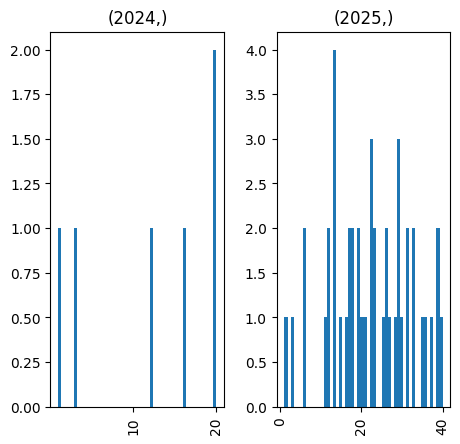

In [17]:
# Gráfico de distribuição de frequencia
#sns.histplot(freqsemana)
freqsemana.hist(
    column='Qtd Compras',
    by=['Ano Compra'],
    figsize=(5, 5),
    grid=False,
    bins=freqsemana['Semana do Ano'].max())

<Axes: xlabel='Semana do Ano'>

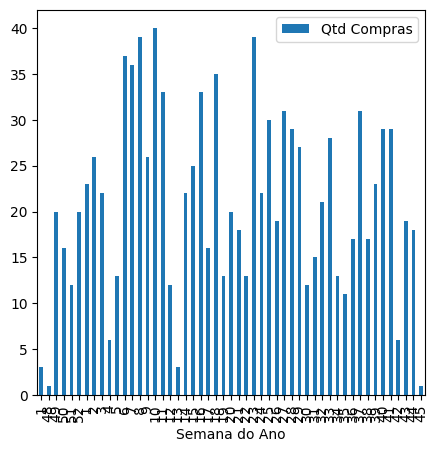

In [18]:
freqsemana.plot.bar(x='Semana do Ano', y='Qtd Compras', figsize=(5, 5))

<Axes: xlabel='Qtd Compras'>

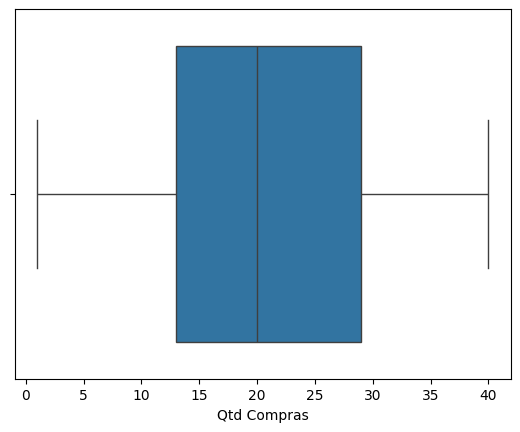

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

sns.boxplot(x=freqsemana['Qtd Compras'])

Text(0.5, 0, 'Qtd Compras')

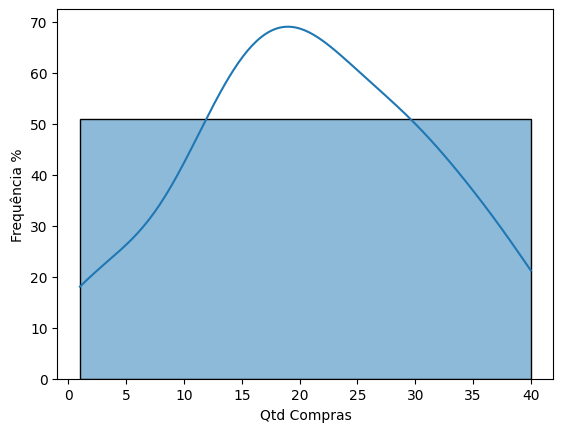

In [20]:
# Cálculo do número de classes, também possível utilizar a Regra de Sturges
bins =  math.ceil((freqsemana['Qtd Compras'].max()\
        -freqsemana['Qtd Compras'].min())\
        /len(freqsemana))
#sns.histplot(freqsemana['Qtd Compras'], bins='auto', kde=True)
sns.histplot(freqsemana['Qtd Compras'], bins=bins, kde=True)
plt.ylabel('Frequência %')
plt.xlabel('Qtd Compras')

In [21]:
# Calcular 30 medias de amostras aleatórias retiradas de dentro do conjunto de dados freqsemana

import numpy as np

num_samples = 80
sample_size = 30

# Teorema Centraal do Limite
dadostcl = []
for _ in range(num_samples):
    sample = np.random.choice(freqsemana['Qtd Compras'], size=sample_size, replace=True)
    sample_mean = np.mean(sample)
    dadostcl.append(sample_mean)

tcl = pd.DataFrame(dadostcl)
tcl.columns=['Média Amostral Qtd Compras / Semana']

<Axes: xlabel='Média Amostral Qtd Compras / Semana'>

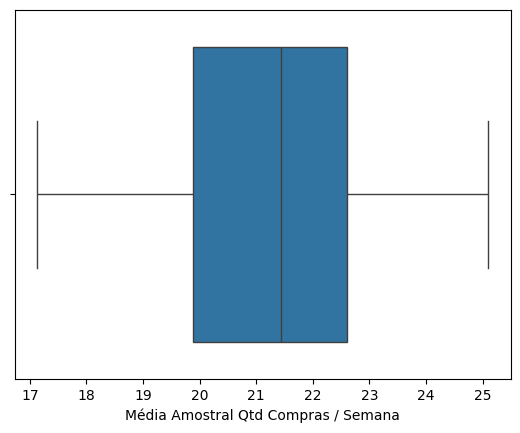

In [22]:
sns.boxplot(x=tcl['Média Amostral Qtd Compras / Semana'], )

Text(0, 0.5, 'Frequência')

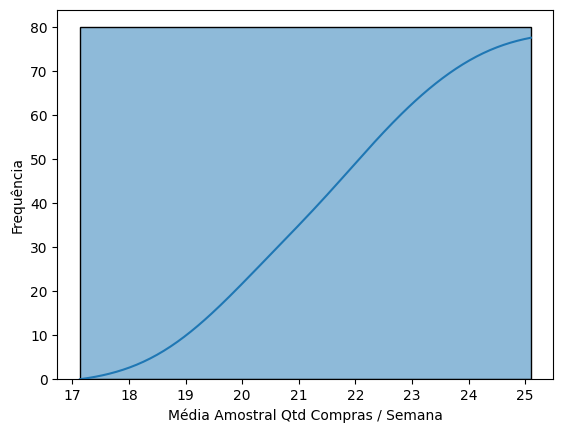

In [23]:
bins =  math.ceil((tcl['Média Amostral Qtd Compras / Semana'].max()\
                  - tcl['Média Amostral Qtd Compras / Semana'].min())\
                  /len(tcl))
sns.histplot(tcl['Média Amostral Qtd Compras / Semana'], kde=True, bins=bins, cumulative=True)
plt.xlabel('Média Amostral Qtd Compras / Semana')
plt.ylabel('Frequência')


Text(0, 0.5, 'Frequência')

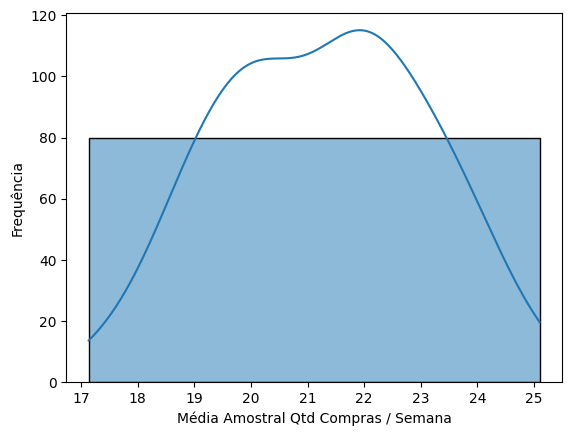

In [24]:
bins =  math.ceil((tcl['Média Amostral Qtd Compras / Semana'].max()\
                  - tcl['Média Amostral Qtd Compras / Semana'].min())\
                  /len(tcl))
sns.histplot(tcl['Média Amostral Qtd Compras / Semana'], kde=True, bins=bins)
plt.xlabel('Média Amostral Qtd Compras / Semana')
plt.ylabel('Frequência')


Text(0, 0.5, 'Frequência')

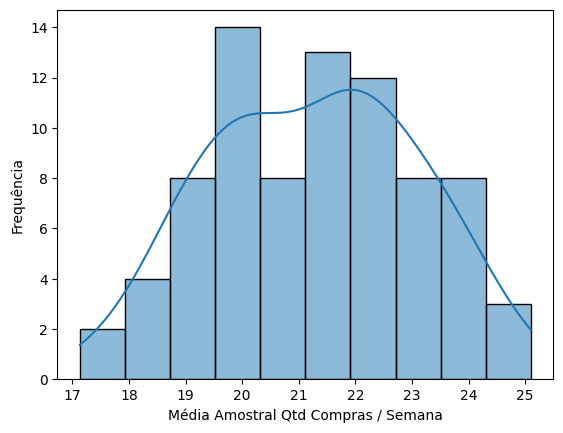

In [25]:
bins=10
sns.histplot(tcl['Média Amostral Qtd Compras / Semana'], kde=True, bins=bins)
plt.xlabel('Média Amostral Qtd Compras / Semana')
plt.ylabel('Frequência')


# Teste T para 1 Média
### Hipotése: A média populacional da Qtd de Compras por Semana é maior que 20.
#### Nível de significância: alfa = 0.05

*   Ho: A média populacional de Qtd de Compras / Semana é menor ou igual a 20.
*   Ha: A média populacional da Qtd de Compras por Semana é maior que 20.
De acordo com postagem no site: https://www.blog.psicometriaonline.com.br/o-que-e-valor-de-p

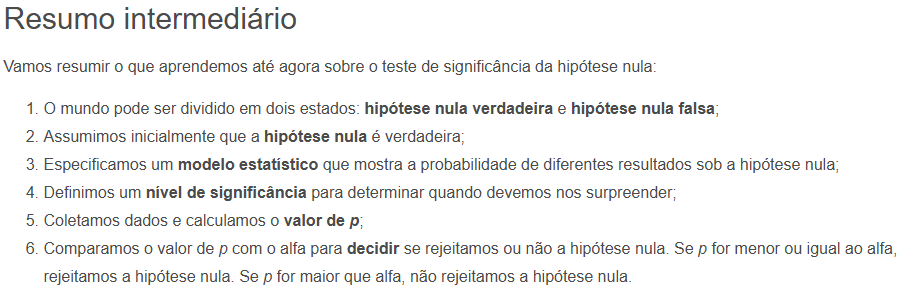

In [26]:
media_amostral = np.mean(tcl['Média Amostral Qtd Compras / Semana'])

print(f'Média amostral = {media_amostral:.4f}')

Média amostral = 21.2596


In [27]:
from scipy.stats import ttest_1samp # Teste T (ttest) para 1 amostra (1samp)

media = 20

test = ttest_1samp(tcl['Média Amostral Qtd Compras / Semana'], media)

(t,pvalor,gl) = test.statistic, test.pvalue, test.df

print(f'Estatística t={t}; p-valor={pvalor}; graus de liberdade={gl}')

Estatística t=6.199891881524323; p-valor=2.4132146344807023e-08; graus de liberdade=79


In [28]:
# Decisão

alfa = 0.05

resultado = False

if pvalor < alfa:
    resultado = True
    print('Rejeitamos a hipótese nula')
else:
    print('Não rejeitamos a hipótese nula')

Rejeitamos a hipótese nula


In [29]:
if resultado:
  print('Logo, A média populacional da Qtd de Compras / Semana é maior do que 20.')
else:
  print('Não há evidências para comprovar que A média populacional da Qtd de Compras / Semana é maior do que 20')

Logo, A média populacional da Qtd de Compras / Semana é maior do que 20.


# Normalidade: Teste de Shapiro

*   Ho: Dados seguem a distribuição normal
*   Ha: Dados não seguem a distribuição normal

Considerando um nível de significância expressivo: alfa = 0.10 (10%)

In [30]:
from scipy.stats import shapiro

test = shapiro(tcl['Média Amostral Qtd Compras / Semana'])

(t,pvalor) = test.statistic, test.pvalue

print(f'Estatística t={t}; p-valor={pvalor}')

Estatística t=0.9853634836759313; p-valor=0.49594602513033736


In [31]:
rejeita = False

if pvalor < alfa:
    rejeita = True
    print('Rejeitamos a hipótese nula')
else:
    print('Não rejeitamos a hipótese nula')

Não rejeitamos a hipótese nula


In [32]:
if rejeita:
  print('Logo, os dados não seguem a distribuição normal.')
else:
  print('Os dados seguem a distribuição normal (a princípio) pois não há evidências que comprovem que os dados seguem distribuição assimétrica.')  # é conveniente assumir que os dados são normais

Os dados seguem a distribuição normal (a princípio) pois não há evidências que comprovem que os dados seguem distribuição assimétrica.


# Shapiro para dados assimétricos
A média de compras segue distribuição assimétrica positiva (cauda à direita)

## Preparação dos dados e análise de distr. do Valor das Compras

In [33]:
dados.head()

,Compra,Valor,Categoria,Arquivo Origem,Fech. Fatura,Data,Ano Compra,Semana do Ano
0,Uber* Trip,"R$ 12,99",Transporte,Nubank_2025-01-11.csv,2025-01-11,2024-12-01,2024,48
1,Amazon Marketplace - Parcela 2/7,"R$ 53,28",Shopping e ecommerce,Nubank_2025-01-11.csv,2025-01-11,2024-12-04,2024,49
2,Saoleopoldomeias - Parcela 2/4,"R$ 75,50",Shopping e ecommerce,Nubank_2025-01-11.csv,2025-01-11,2024-12-04,2024,49
3,Amazon Marketplace - Parcela 7/8,"R$ 53,13",Shopping e ecommerce,Nubank_2025-01-11.csv,2025-01-11,2024-12-04,2024,49
4,Amazon Marketplace - Parcela 3/6,"R$ 55,20",Shopping e ecommerce,Nubank_2025-01-11.csv,2025-01-11,2024-12-04,2024,49


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np

In [35]:
dados.Valor

# Extrai somente o número decimal
valor = dados.Valor.str\
      .extract(r'(\d+\,\d+)')\
      .replace(',','.', regex=True)\
      .astype(float)
valor.head()

,0
0,12.99
1,53.28
2,75.50
3,53.13
4,55.20


In [36]:
valormin = np.min(valor)
valormax = np.max(valor)

print(f'Valor mínimo = {valormin:.2f}')
print(f'Valor máximo = {valormax:.2f}')

Valor mínimo = 0.00
Valor máximo = 855.61


In [37]:
Q1 = valor.quantile(0.25)[0]
Q2 = valor.quantile(0.50)[0]
Q3 = valor.quantile(0.75)[0]

# Intervalo Interquartil (Interquartile Range)
IQR = Q3 - Q1

(Q1,Q2,Q3,IQR)

(np.float64(13.925), np.float64(29.99), np.float64(60.925), np.float64(47.0))

In [38]:
lim_inferior = (Q1 - 1.5 * IQR)
lim_superior = (Q3 + 1.5 * IQR)

lim_inferior, lim_superior

(np.float64(-56.575), np.float64(131.425))

In [39]:
valor_sem_outlier = valor[(valor >= lim_inferior) & (valor <= lim_superior)].reset_index(drop=True)

valor_sem_outlier.head()

,0
0,12.99
1,53.28
2,75.50
3,53.13
4,55.20


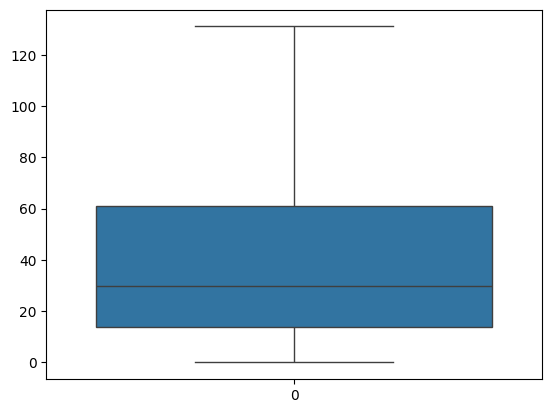

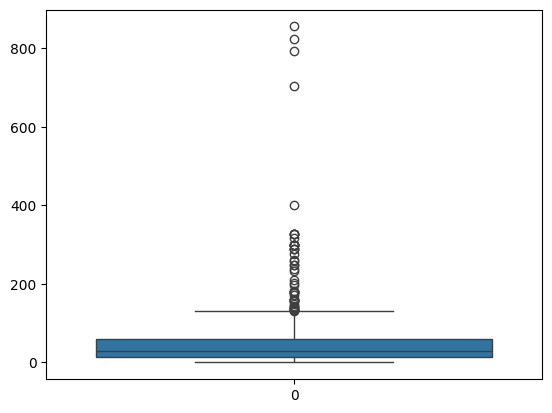

In [40]:
sns.boxplot(data=valor, showfliers=False) # Fliers "mosqueiros" aqui significando os outliers que não temos interesse em mostrar
plt.show()
sns.boxplot(data=valor, showfliers=True)
plt.show()

<Axes: ylabel='Count'>

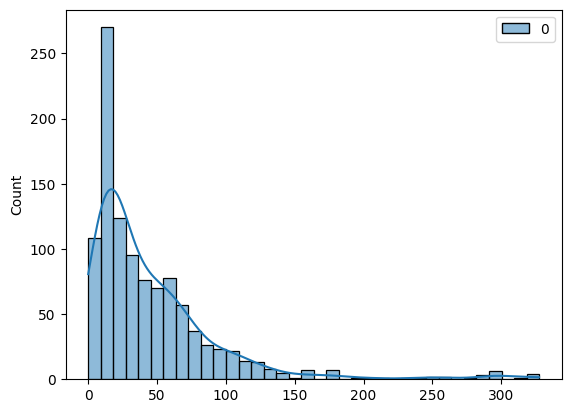

In [41]:
sns.histplot(valor[valor<=400], bins='auto', kde=True)

<Axes: ylabel='Count'>

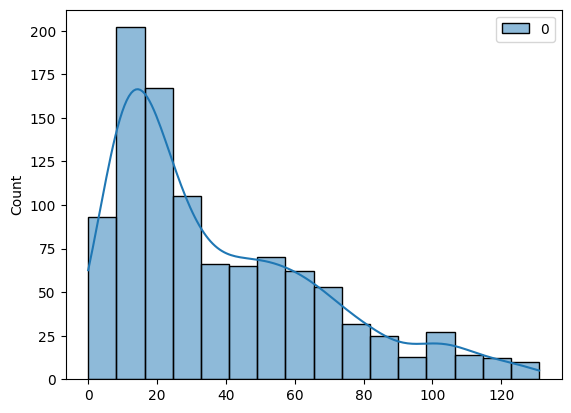

In [42]:
sns.histplot(valor_sem_outlier, bins='auto', kde=True)

## Teste de Shapiro para distribuição assimétrica
### No exemplo: distr. assimétrica positiva (cauda a direita)
---
*   Ho: Distr. dos dados é normal.
*   Ha: Distr. dos dados é assimétrica.

alfa = 0.05

In [43]:
from scipy.stats import shapiro

valor.columns = ['Valor']

test = shapiro(valor.Valor)

(t,pvalor) = test.statistic, test.pvalue

print(f'Estatística t={t}; p-valor={pvalor}')


Estatística t=0.528411106887374; p-valor=1.1675416649672472e-46


In [44]:
# Decisão

rejeita = False
if pvalor < alfa:
    rejeita = True
    print('Rejeitamos a hipótese nula')
else:
    print('Não rejeitamos a hipótese nula')

Rejeitamos a hipótese nula


In [45]:
if rejeita:
  print('Logo, os dados não seguem a distribuição normal.')
else:
  print('Os dados seguem a distribuição normal (a princípio) pois não há evidências que comprovem que os dados seguem distribuição assimétrica.')

Logo, os dados não seguem a distribuição normal.


## Transformação Logarítmica com Numpy

In [46]:
import numpy as np

# Transformação matemática com aplicação linha a linha do logaritmo natural
ln_valores = np.log(valor['Valor'])
ln_valores.head()

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Valor
0,2.564180
1,3.975561
2,4.324133
3,3.972742
4,4.010963


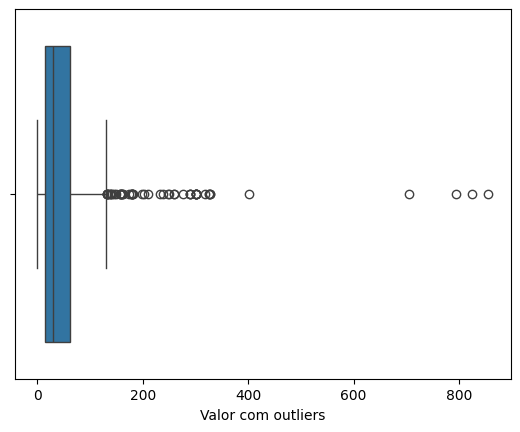

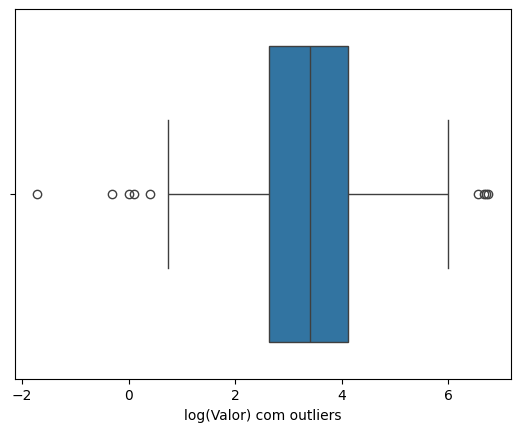

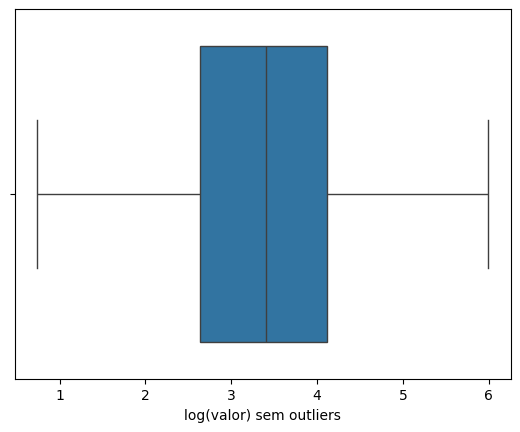

In [47]:
import seaborn as sns

sns.boxplot(valor['Valor'], showfliers=True, orient='h')
plt.xlabel('Valor com outliers')
plt.show()

sns.boxplot(ln_valores, showfliers=True, orient='h')
plt.xlabel('log(Valor) com outliers')
plt.show()

sns.boxplot(ln_valores, showfliers=False, orient='h')
plt.xlabel('log(valor) sem outliers')
plt.show()

Text(0, 0.5, 'Frequência')

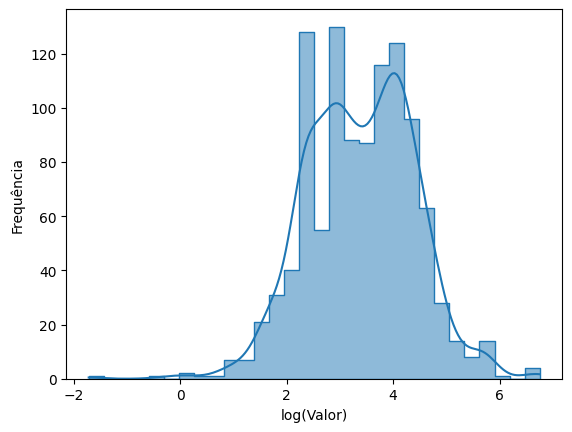

In [48]:
sns.histplot(ln_valores, bins='auto', kde=True, element='step')
plt.xlabel('log(Valor)')
plt.ylabel('Frequência')

In [49]:
# Verifica se há valores infinitos, precisamos removê-los!
eh_infinito = np.isinf(ln_valores)
ln_valores[eh_infinito]

,Valor
205,-inf
206,-inf


In [50]:
ln_valores.dropna(inplace=True)
ln_valores.head()

,Valor
0,2.564180
1,3.975561
2,4.324133
3,3.972742
4,4.010963


In [51]:
ln_valores.drop(ln_valores[eh_infinito].index, inplace=True)
ln_valores[eh_infinito]

,Valor


In [52]:
# Teste de Shapiro em dados transformados com outliers
# Removendo Nan (ex. log(-5)) e infinitos (ex. log(0))
test = shapiro(ln_valores)

(t,pvalor) = test.statistic, test.pvalue

print(f'Estatística t={t}; p-valor={pvalor}')

Estatística t=0.9903327163849749; p-valor=1.76174519576781e-06


In [53]:
quartil = ln_valores.quantile([0.25,0.75])
Q1 = quartil[0.25]
Q3 = quartil[0.75]
IQR = Q3 - Q1

print(f'Q1 = {Q1:.4f}')
print(f'Q3 = {Q3:.4f}')
print(f'IQR = {IQR:.4f}')

ln_valores.sort_values(inplace=True)
ln_valores.reset_index(drop=True, inplace=True)

ln_valores = ln_valores[(ln_valores >= Q1) & (ln_valores <= Q3)]
ln_valores

Q1 = 2.6391
Q3 = 4.1116
IQR = 1.4725


,Valor
266,2.639057
267,2.639057
268,2.639057
269,2.639057
270,2.649715
...,...
796,4.109233
797,4.109233
798,4.109233
799,4.109397


In [54]:
# Teste de Shapiro em dados transformados
test = shapiro(ln_valores)

(t,pvalor) = test.statistic, test.pvalue

print(f'Estatística t={t}; p-valor={pvalor}')

Estatística t=0.9340694695274324; p-valor=1.2731868203856273e-14


Text(0, 0.5, 'Frequência')

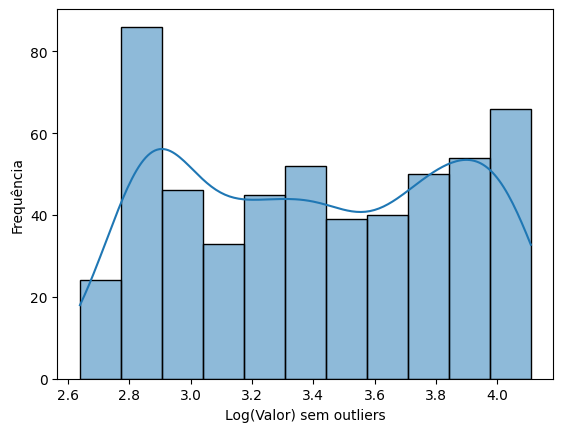

In [55]:
sns.histplot(ln_valores, bins='auto', kde=True)
plt.xlabel('Log(Valor) sem outliers')
plt.ylabel('Frequência')

In [56]:
# Decisão

rejeita = False
if pvalor < alfa:
    rejeita = True
    print('Rejeitamos a hipótese nula')
else:
    print('Não rejeitamos a hipótese nula')

Rejeitamos a hipótese nula


In [57]:
if rejeita:
  print('Logo, os dados não seguem a distribuição normal.')
else:
  print('Os dados seguem a distribuição normal (a princípio) pois não há evidências que comprovem que os dados seguem distribuição assimétrica.')

Logo, os dados não seguem a distribuição normal.


# 2 Médias Independentes
(ttest_ind)


---


Tese: A média do gasto mensal em Shopping e Ecommerce é estatisticamente igual a média do gasto mensal em Ifood.

Ho: μshopping = μifood\
Ha: μshopping <> μifood

In [58]:
dados.head()

,Compra,Valor,Categoria,Arquivo Origem,Fech. Fatura,Data,Ano Compra,Semana do Ano
0,Uber* Trip,"R$ 12,99",Transporte,Nubank_2025-01-11.csv,2025-01-11,2024-12-01,2024,48
1,Amazon Marketplace - Parcela 2/7,"R$ 53,28",Shopping e ecommerce,Nubank_2025-01-11.csv,2025-01-11,2024-12-04,2024,49
2,Saoleopoldomeias - Parcela 2/4,"R$ 75,50",Shopping e ecommerce,Nubank_2025-01-11.csv,2025-01-11,2024-12-04,2024,49
3,Amazon Marketplace - Parcela 7/8,"R$ 53,13",Shopping e ecommerce,Nubank_2025-01-11.csv,2025-01-11,2024-12-04,2024,49
4,Amazon Marketplace - Parcela 3/6,"R$ 55,20",Shopping e ecommerce,Nubank_2025-01-11.csv,2025-01-11,2024-12-04,2024,49


## Preparação de dados


In [59]:
dadoscat = dados[['Valor','Categoria','Fech. Fatura']]
dadoscat.Valor = dadoscat.Valor.str\
                .extract(r'(\d+\,\d+)')\
                .replace(',','.', regex=True)\
                .astype(float)
dadoscat

/tmp/ipython-input-2254711897.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dadoscat.Valor = dadoscat.Valor.str\


,Valor,Categoria,Fech. Fatura
0,12.99,Transporte,2025-01-11
1,53.28,Shopping e ecommerce,2025-01-11
2,75.50,Shopping e ecommerce,2025-01-11
3,53.13,Shopping e ecommerce,2025-01-11
4,55.20,Shopping e ecommerce,2025-01-11
...,...,...,...
1065,31.00,Transporte,2025-11-11
1066,17.90,Lavanderia,2025-11-11
1067,5.87,Transporte,2025-11-11
1068,126.86,Mercados,2025-11-11


In [60]:
dadoscat = dadoscat[dadoscat.Categoria.isin(['Shopping e ecommerce','Ifood'])]
dadoscat.head()

,Valor,Categoria,Fech. Fatura
1,53.28,Shopping e ecommerce,2025-01-11
2,75.50,Shopping e ecommerce,2025-01-11
3,53.13,Shopping e ecommerce,2025-01-11
4,55.20,Shopping e ecommerce,2025-01-11
5,30.08,Shopping e ecommerce,2025-01-11


In [61]:
dadosagrupados = dadoscat.groupby(['Categoria']).agg({'Valor':'mean'} )
dadosagrupados.Valor = dadosagrupados.Valor.round(2)
dadosagrupados

,Valor
Categoria,
Ifood,62.04
Shopping e ecommerce,56.59


## Agrupamento de média por Categoria
['Ifood', 'Shopping e ecommerce']

In [62]:
from scipy.stats import ttest_ind

# Teste T (ttest) para 2 amostras

# Assumindo variâncias iguais
test = ttest_ind(dadoscat[dadoscat.Categoria == 'Ifood'].Valor,
                 dadoscat[dadoscat.Categoria == 'Shopping e ecommerce'].Valor,
                 equal_var=True)
test

TtestResult(statistic=np.float64(1.1929974860143784), pvalue=np.float64(0.23369015265266654), df=np.float64(345.0))

In [63]:
print(f'Estatística t={test.statistic:.4f}; p-valor={test.pvalue:.4f}; df={test.df:.4f}; Variâncias Iguais.')

Estatística t=1.1930; p-valor=0.2337; df=345.0000; Variâncias Iguais.


In [64]:
test = ttest_ind(dadoscat[dadoscat.Categoria == 'Ifood'].Valor,
                 dadoscat[dadoscat.Categoria == 'Shopping e ecommerce'].Valor,
                 equal_var=False)
test

TtestResult(statistic=np.float64(1.193336547507192), pvalue=np.float64(0.23356283939950187), df=np.float64(342.79308400271714))

In [65]:
print(f'Estatística t={test.statistic:.4f}; p-valor={test.pvalue:.4f}; df={test.df:.4f}; Variâncias Diferentes.')

Estatística t=1.1933; p-valor=0.2336; df=342.7931; Variâncias Diferentes.


In [66]:
# Mas as variâncias podem ser diferentes, verifique-mos
dfIfood = dadoscat[dadoscat.Categoria == 'Ifood']
dfShopping = dadoscat[dadoscat.Categoria == 'Shopping e ecommerce']

In [67]:
ifood_dp = dfIfood.Valor.std()
shopping_dp = dfShopping.Valor.std()

print(f'Desvio padrão Ifood = {ifood_dp:.4f}')
print(f'Desvio padrão Shopping = {shopping_dp:.4f}')

Desvio padrão Ifood = 42.3011
Desvio padrão Shopping = 42.5793


### Teste de Levene para verificar se variâncias iguais

Ho: Variancias iguais\
Ha: Variancias diferentes\
alfa = 0.10

In [68]:
from scipy.stats import levene
stat, p_valor = levene(dfIfood.Valor, dfShopping.Valor)

print(f'Estatística t={stat:.4f}; p-valor={p_valor:.4f}')

Estatística t=0.2654; p-valor=0.6068


In [69]:
# Decisão quanto as variâncias das médias de 'Ifood' e 'Shopping e ecommerce'

if p_valor < alfa:
    print('Rejeitamos a hipótese nula.')
    print('Portanto, as variâncias são diferentes.')
else:
    print('Não rejeitamos a hipótese nula')
    print('Portanto, não há evidências que comprovem que as variâncias são diferentes.')

Não rejeitamos a hipótese nula
Portanto, não há evidências que comprovem que as variâncias são diferentes.


## Assumindo igual variância da média mensal para diferentes categorias

In [70]:
# Assumindo variâncias iguais
test = ttest_ind(dadoscat[dadoscat.Categoria == 'Ifood'].Valor,
                 dadoscat[dadoscat.Categoria == 'Shopping e ecommerce'].Valor,
                 equal_var=True)
stat, p_valor = test.statistic, test.pvalue

print(f'Estatística t={stat:.4f}; p-valor={p_valor:.4f}; Variâncias Iguais.')

Estatística t=1.1930; p-valor=0.2337; Variâncias Iguais.


In [71]:
alfa = 0.05

if p_valor < alfa:
    print('Rejeitamos a hipótese nula')
    print('Portanto, há evidências de que as médias sejam distintas estatisticamente.')
else:
    print('Não rejeitamos a hipótese nula')
    print('Portanto, não há evidências de que as médias sejam distintas estatisticamente.')

Não rejeitamos a hipótese nula
Portanto, não há evidências de que as médias sejam distintas estatisticamente.


# 2 Média Independentes


In [72]:
import numpy as np
import pandas as pd

dados.head()

,Compra,Valor,Categoria,Arquivo Origem,Fech. Fatura,Data,Ano Compra,Semana do Ano
0,Uber* Trip,"R$ 12,99",Transporte,Nubank_2025-01-11.csv,2025-01-11,2024-12-01,2024,48
1,Amazon Marketplace - Parcela 2/7,"R$ 53,28",Shopping e ecommerce,Nubank_2025-01-11.csv,2025-01-11,2024-12-04,2024,49
2,Saoleopoldomeias - Parcela 2/4,"R$ 75,50",Shopping e ecommerce,Nubank_2025-01-11.csv,2025-01-11,2024-12-04,2024,49
3,Amazon Marketplace - Parcela 7/8,"R$ 53,13",Shopping e ecommerce,Nubank_2025-01-11.csv,2025-01-11,2024-12-04,2024,49
4,Amazon Marketplace - Parcela 3/6,"R$ 55,20",Shopping e ecommerce,Nubank_2025-01-11.csv,2025-01-11,2024-12-04,2024,49
